In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline



data = loadmat('Downloads/data_nb/ex8_movies.mat')

In [3]:
data

{'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0'}

In [4]:
Y = data['Y']
R = data['R']

In [5]:
Y.shape, R.shape

((1682L, 943L), (1682L, 943L))

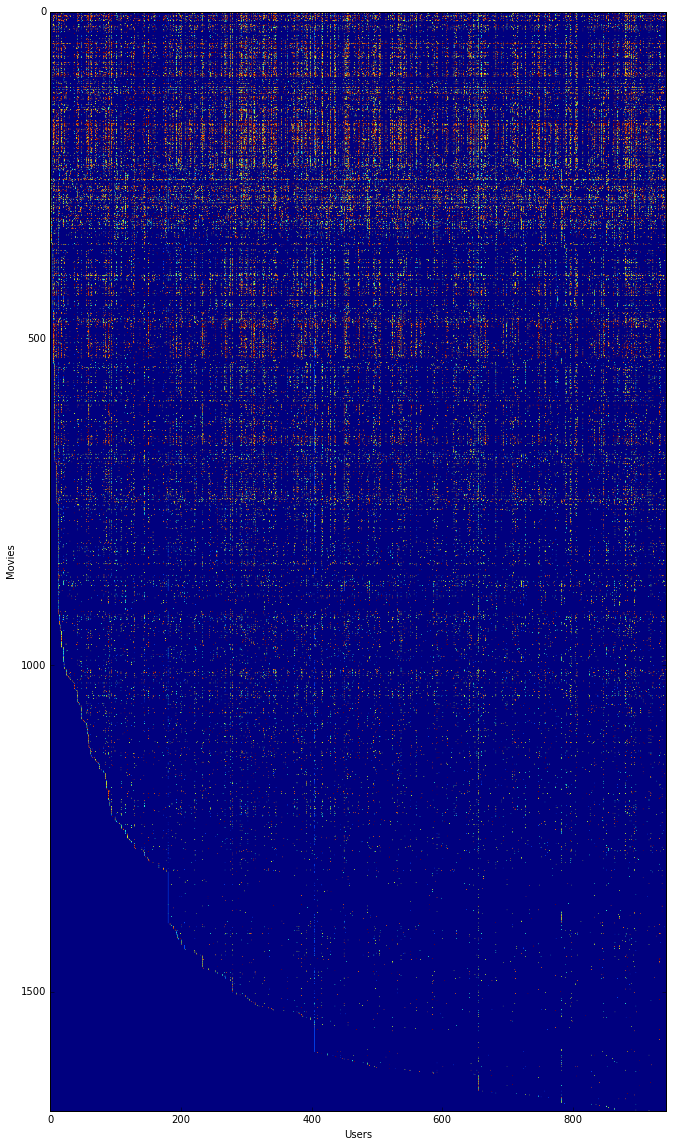

In [6]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
fig.tight_layout()

In [7]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)  
    R = np.matrix(R)  
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features))) 
    
    J = 0
    error = np.multiply((X * Theta.T) - Y, R)  
    squared_error = np.power(error, 2) 
    J = (1. / 2) * np.sum(squared_error)
    
    return J

In [8]:
params = loadmat('Downloads/data_nb/ex8_movieParams.mat')
X =params['X']
Theta = params['Theta']

X.shape, Theta.shape

((1682L, 10L), (943L, 10L))

In [9]:
def cost(params, Y, R, num_features, learning_rate):
    Y = np.matrix(Y)  
    R = np.matrix(R)  
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
 
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  
 
    J = 0
    X_grad = np.zeros(X.shape)  
    Theta_grad = np.zeros(Theta.shape)  
  
    error = np.multiply((X * Theta.T) - Y, R)  
    squared_error = np.power(error, 2) 
    J = (1. / 2) * np.sum(squared_error)
    
   
    J = J + ((learning_rate / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((learning_rate / 2) * np.sum(np.power(X, 2)))
    
    
    X_grad = (error * Theta) + (learning_rate * X)
    Theta_grad = (error.T * X) + (learning_rate * Theta)
    
    
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [12]:
users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
Theta_sub = Theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))



In [13]:
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
J, grad

(31.344056244274221,
 array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
          2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
         -0.89247334,   0.29684395,   1.06300933,   0.66738144,
          0.60252677,   4.90185327,  -0.19747928, -10.13985478,
          2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
         -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
          1.09289758,  -0.40784086,   0.49026541]))

In [14]:
movie_idx = {}
f = open('Downloads/data_nb/movie_ids.txt')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [15]:
movie_idx[1]

'GoldenEye (1995)'

In [16]:
ratings = np.zeros((1682, 1))

ratings[0] = 4
ratings[6] = 3
ratings[11] = 5
ratings[53] = 4
ratings[63] = 5
ratings[65] = 3
ratings[68] = 5
ratings[97] = 2
ratings[182] = 4
ratings[225] = 5
ratings[354] = 5

print('Rated {0} with {1} stars.'.format(movie_idx[0], str(int(ratings[0]))))
print('Rated {0} with {1} stars.'.format(movie_idx[6], str(int(ratings[6]))))
print('Rated {0} with {1} stars.'.format(movie_idx[11], str(int(ratings[11]))))
print('Rated {0} with {1} stars.'.format(movie_idx[53], str(int(ratings[53]))))
print('Rated {0} with {1} stars.'.format(movie_idx[63], str(int(ratings[63]))))
print('Rated {0} with {1} stars.'.format(movie_idx[65], str(int(ratings[65]))))
print('Rated {0} with {1} stars.'.format(movie_idx[68], str(int(ratings[68]))))
print('Rated {0} with {1} stars.'.format(movie_idx[97], str(int(ratings[97]))))
print('Rated {0} with {1} stars.'.format(movie_idx[182], str(int(ratings[182]))))
print('Rated {0} with {1} stars.'.format(movie_idx[225], str(int(ratings[225]))))
print('Rated {0} with {1} stars.'.format(movie_idx[354], str(int(ratings[354]))))

Rated Toy Story (1995) with 4 stars.
Rated Twelve Monkeys (1995) with 3 stars.
Rated Usual Suspects, The (1995) with 5 stars.
Rated Outbreak (1995) with 4 stars.
Rated Shawshank Redemption, The (1994) with 5 stars.
Rated While You Were Sleeping (1995) with 3 stars.
Rated Forrest Gump (1994) with 5 stars.
Rated Silence of the Lambs, The (1991) with 2 stars.
Rated Alien (1979) with 4 stars.
Rated Die Hard 2 (1990) with 5 stars.
Rated Sphere (1998) with 5 stars.


In [17]:
R = data['R']
Y = data['Y']

Y = np.append(Y, ratings, axis=1)
R = np.append(R, ratings != 0, axis=1)

Y.shape, R.shape, ratings.shape

((1682L, 944L), (1682L, 944L), (1682L, 1L))

In [18]:
movies = Y.shape[0]  # 1682
users = Y.shape[1]  # 944
features = 10
learning_rate = 10.

X = np.random.random(size=(movies, features))
Theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(X), np.ravel(Theta)))

X.shape, Theta.shape, params.shape

((1682L, 10L), (944L, 10L), (26260L,))

In [19]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))

for i in range(movies):
    idx = np.where(R[i,:] == 1)[0]
    Ymean[i] = Y[i,idx].mean()
    Ynorm[i,idx] = Y[i,idx] - Ymean[i]

Ynorm.mean()

5.5070364565159845e-19

In [20]:
from scipy.optimize import minimize

fmin = minimize(fun=cost, x0=params, args=(Ynorm, R, features, learning_rate), 
                method='CG', jac=True, options={'maxiter': 100})
fmin

  status: 1
 success: False
    njev: 147
    nfev: 147
     fun: 38965.021220026334
       x: array([ 0.29665098,  0.24251667,  0.15601504, ..., -0.09961829,
        0.12071638, -0.00214713])
 message: 'Maximum number of iterations has been exceeded.'
     jac: array([ 0.00341524, -0.01795045, -0.00733983, ..., -0.00021592,
        0.00027238,  0.00034386])

In [21]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
Theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

X.shape, Theta.shape

((1682L, 10L), (944L, 10L))

In [22]:
predictions = X * Theta.T 
my_preds = predictions[:, -1] + Ymean
my_preds.shape

(1682L, 1L)

In [23]:
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

matrix([[ 5.00000129],
        [ 5.00000081],
        [ 5.00000059],
        [ 5.00000049],
        [ 5.00000034],
        [ 5.00000032],
        [ 4.99999992],
        [ 4.9999999 ],
        [ 4.99999978],
        [ 4.99999943]])

In [24]:
idx = np.argsort(my_preds, axis=0)[::-1]
idx

matrix([[1200],
        [ 813],
        [1466],
        ..., 
        [1574],
        [1576],
        [ 438]], dtype=int64)

In [25]:
print("Top 10 movie predictions:")
for i in range(10):
    j = int(idx[i])
    print('Predicted rating of {0} for movie {1}.'.format(str(float(my_preds[j])), movie_idx[j]))

Top 10 movie predictions:
Predicted rating of 5.00000128534 for movie Marlene Dietrich: Shadow and Light (1996) .
Predicted rating of 5.00000080761 for movie Great Day in Harlem, A (1994).
Predicted rating of 5.00000059496 for movie Saint of Fort Washington, The (1993).
Predicted rating of 5.00000049339 for movie They Made Me a Criminal (1939).
Predicted rating of 5.00000033976 for movie Aiqing wansui (1994).
Predicted rating of 5.00000032157 for movie Entertaining Angels: The Dorothy Day Story (1996).
Predicted rating of 4.99999991701 for movie Santa with Muscles (1996).
Predicted rating of 4.99999990297 for movie Someone Else's America (1995).
Predicted rating of 4.99999977628 for movie Prefontaine (1997).
Predicted rating of 4.99999943268 for movie Star Kid (1997).
